<a href="https://colab.research.google.com/github/AhmedAdelElbaz/Arduino-Work/blob/main/Creative_Minds_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
from asyncore import write
from dataclasses import replace
from itertools import count
from locale import normalize
from random import sample, shuffle
from turtle import width
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

In [132]:
data = pd.read_csv('/content/trainingdata.csv', index_col=0)
data.shape
data.describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_4991,gene_4992,gene_4993,gene_4994,gene_4995,gene_4996,gene_4997,gene_4998,gene_4999,gene_5000
count,65.000000,600.000000,355.000000,600.000000,549.000000,535.000000,600.000000,600.000000,479.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.152797,10.189279,7.573543,9.721694,11.894184,9.165010,16.454019,15.517376,10.091952,4.970728,...,10.677761,535.746773,10.456841,892.414584,0.700338,13.850775,5.344296,0.199906,7.365950,10.802939
std,1.706884,1.230677,0.447046,5.292511,0.637183,0.547469,5.169813,5.067225,1.102212,4.203977,...,8.595839,5.635481,8.507882,8.727742,0.006962,4.898953,4.472732,0.001965,5.267644,9.050029
min,0.464355,7.872404,5.681137,0.000000,9.978353,6.059995,0.729162,1.190847,6.515872,0.000000,...,0.000000,517.617091,0.000000,870.190864,0.680851,0.000000,0.000000,0.194707,0.000000,0.000000
25%,2.040472,9.251098,7.288121,5.945803,11.444171,8.820331,12.719576,12.018328,9.409285,1.358236,...,3.470397,532.088173,2.761687,886.332338,0.695900,10.310382,1.234284,0.198563,3.129964,2.839298
50%,2.888052,9.925828,7.577429,9.911280,11.841879,9.103883,16.269931,15.398189,10.206660,4.436556,...,9.817944,535.804927,9.548563,892.188333,0.700002,13.843898,4.914802,0.199918,6.813815,9.657708
75%,3.933686,10.805914,7.861607,13.343368,12.333393,9.490411,19.755172,18.801191,10.847829,7.666387,...,16.025598,539.373662,16.693742,898.484287,0.704558,17.104707,8.293804,0.201168,11.052261,17.116483
max,9.791109,14.226224,8.966289,23.297873,13.594744,12.123206,33.373274,31.124723,13.421329,21.130483,...,36.553480,552.093988,35.351412,921.123495,0.724075,29.662142,19.769599,0.205377,23.512562,38.873169


In [133]:
labels = pd.read_csv('/content/traininglabels.csv', index_col=0)

Create Validator

In [134]:
from sklearn.model_selection import train_test_split
data , X_validator , labels , y_validator = train_test_split(data , labels['x'], stratify=labels, random_state=42,  test_size = 0.05,shuffle=True)
print(X_validator.shape)
print(y_validator.shape)

(30, 5000)
(30,)


Data Preprocessing

In [135]:
# Check NAs at gene level
percentage_na_genes = pd.DataFrame(((data.isna().sum()/data.shape[0])*100).sort_values(ascending=False),columns=['Percentage'])

# Check NAs at sample level
percentage_na_samples = pd.DataFrame(((data.isna().sum(axis = 1)/data.shape[1])*100).sort_values(ascending=False), columns=['Percentage'])


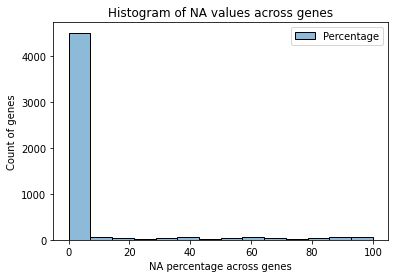

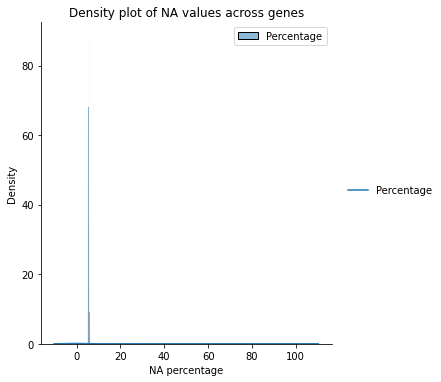

468


In [136]:
# genes
sns.histplot(percentage_na_genes)
plt.title("Histogram of NA values across genes")
plt.xlabel("NA percentage across genes")
plt.ylabel("Count of genes")
sns.displot(percentage_na_genes , kind = "kde")
plt.title("Density plot of NA values across genes")
plt.xlabel("NA percentage")

# samples
sns.histplot(percentage_na_samples)
plt.show()

#How many % of genes having NA more than 10%
print(len(percentage_na_genes[percentage_na_genes['Percentage']>10])) # 50 genes 100% NAs


In [137]:
percentage_na_genes_high_na = percentage_na_genes[percentage_na_genes['Percentage']>10] # 471 genes 100% NAs

data_filtered = data.drop(percentage_na_genes_high_na.index, axis=1)
data_filtered.shape


(570, 4532)

In [138]:
"""
Remove zeros 
"""
genes_zeros = data_filtered.sum()
genes_zeros.sort_values()
data_filtered  = data_filtered.drop(genes_zeros[genes_zeros == 0].index, axis = 1)
data_filtered.shape


(570, 4458)

In [139]:
"""
Impute NAs with KNN
"""

#Labels to be modified
class0 = labels[labels == 0].index
class1 = labels[labels == 1].index
print(class0)
print(class1)

data_filtered_class0 = data_filtered.loc[class0,:]
data_filtered_class1 = data_filtered.loc[class1,:]
print(data_filtered_class0.shape)
print(data_filtered_class1.shape)

labels = [0]*len(class0)+[1]*len(class1)#to arrange the labels in the same order as the training data

Index(['training_sample_33', 'training_sample_407', 'training_sample_171',
       'training_sample_168', 'training_sample_199', 'training_sample_530',
       'training_sample_513', 'training_sample_474', 'training_sample_77',
       'training_sample_442',
       ...
       'training_sample_501', 'training_sample_598', 'training_sample_86',
       'training_sample_111', 'training_sample_243', 'training_sample_550',
       'training_sample_193', 'training_sample_481', 'training_sample_500',
       'training_sample_562'],
      dtype='object', length=356)
Index(['training_sample_247', 'training_sample_12', 'training_sample_558',
       'training_sample_289', 'training_sample_137', 'training_sample_561',
       'training_sample_387', 'training_sample_216', 'training_sample_42',
       'training_sample_439',
       ...
       'training_sample_215', 'training_sample_338', 'training_sample_340',
       'training_sample_416', 'training_sample_226', 'training_sample_248',
       'training_sampl

In [140]:
"""
KNN imputatiom
"""
from sklearn.impute import KNNImputer
imp_knn = KNNImputer(n_neighbors=5 , missing_values= np.nan)

data_imputed_class0 = imp_knn.fit_transform(data_filtered_class0)
data_imputed_class0 = pd.DataFrame(data_imputed_class0, columns=data_filtered_class0.columns,index=data_filtered_class0.index)

data_imputed_class1 = imp_knn.fit_transform(data_filtered_class1)
data_imputed_class1 = pd.DataFrame(data_imputed_class1, columns=data_filtered_class1.columns,index=data_filtered_class1.index)

data_imputed = data_imputed_class0.append(data_imputed_class1)
data_imputed.isna().sum()
data_imputed.shape


(570, 4458)

In [141]:
"""
check for duplication
"""

set(data_imputed.transpose().duplicated())
genes_duplicated = pd.DataFrame(data_imputed.transpose().duplicated(), columns = ['Bool'])
genes_duplicated[genes_duplicated['Bool']== False].index
set(data_imputed.transpose().duplicated())


{False}

In [142]:
"""
check for skewness
"""
genes_table = pd.DataFrame()
genes_table['skewness'] = data_imputed.skew()
for gene in data_imputed.columns:
    if genes_table.loc[gene,'skewness'] < -0.01:
        genes_table.loc[gene, 'skewness_direction'] = 'left skewed'
    elif genes_table.loc[gene,'skewness'] > 0.01:
        genes_table.loc[gene, 'skewness_direction'] = 'right skewed'
    else:
        genes_table.loc[gene, 'skewness_direction'] = 'normally dist.'

evaluator = 'skewness_direction'

len(genes_table[genes_table[evaluator]== 'left skewed'])
len(genes_table[genes_table[evaluator]== 'right skewed'])
len(genes_table[genes_table[evaluator]== 'normally dist.'])


181

In [89]:
"""
check for normality
"""
#check for normality
from scipy.stats import shapiro, ranksums, kstest , anderson
from statsmodels.stats.diagnostic import normal_ad
data_type = data_imputed.copy()
for gene in data_type.columns:
    #With shapiro test
    genes_table.loc[gene,'shapiro_pvalue'] = shapiro(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'shapiro_pvalue'] > 0.05:
        genes_table.loc[gene, 'shapiro_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'shapiro_normal'] = 'not_normal'
    #with kolmogrov smirnov
    genes_table.loc[gene,'ktest_pvalue'] = kstest(data_type.loc[:,gene], 'norm').pvalue
    if genes_table.loc[gene,'ktest_pvalue'] > 0.05:
        genes_table.loc[gene, 'ktest_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'ktest_normal'] = 'not_normal'
    #with Anderson darling
    genes_table.loc[gene, 'Andersons_darling_pvalue'] = normal_ad(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'Andersons_darling_pvalue'] > 0.05:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'not_normal'

genes_table.isna().sum()    

evaluator = 'shapiro_normal'#'Andersons_darling_normal' #'ktest_normal'  #'shapiro_normal'

len(genes_table[genes_table[evaluator]== 'normal'])
len(genes_table[genes_table[evaluator]== 'not_normal'])


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


2489

In [143]:
"""
Outlier Detection
"""
"""
Outliers Detection
"""
def Outlier_func(vector):
  outliers = []
  vector = sorted(vector)
  q1, q3= np.percentile(vector,[15,85])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  for value in vector:
    if value < lower_bound:
      outliers.append(value)
    elif value > upper_bound:
      outliers.append(value)
  return outliers


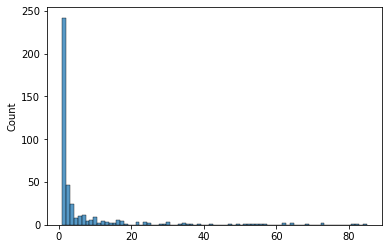

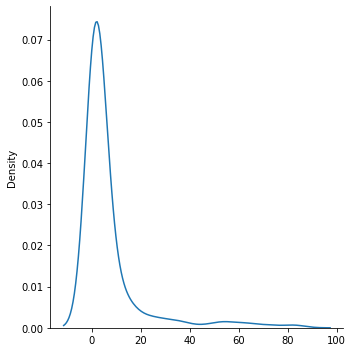

           count_of_outliers
gene_2848                 85
gene_2270                 82
gene_1433                 81
gene_776                  73
gene_1685                 73
...                      ...
gene_3294                  1
gene_1165                  1
gene_1151                  1
gene_3322                  1
gene_2555                  1

[422 rows x 1 columns]


In [144]:
#outliers in the data imputed
outliers = {}
genes_names = []
len_outliers =[]
for gene in data_imputed.columns:
  outliers[f'{gene}_Outlier'] = Outlier_func(data_imputed.loc[:,gene])
  if len(Outlier_func(data_imputed.loc[:,gene])) != 0:
    genes_names.append(gene)
    len_outliers.append(len(Outlier_func(data_imputed.loc[:,gene])))

sns.histplot(len_outliers)
sns.displot(len_outliers , kind = "kde")
plt.show()

genes_names = pd.DataFrame(index = genes_names)
genes_names['count_of_outliers'] = len_outliers
genes_names = genes_names.sort_values('count_of_outliers', ascending = False)
print(genes_names)

In [145]:
data_imputed = data_imputed.drop(genes_names[genes_names.iloc[:,0]>=10].index, axis = 1)
len(genes_names[genes_names.iloc[:,0]>=10])
data_imputed.shape

(570, 4387)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


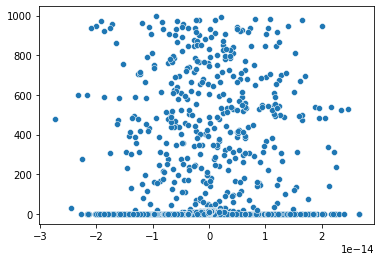

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy =True)
data_scaled = scaler.fit_transform(data_imputed)
data_scaled = pd.DataFrame(data_scaled , columns = data_imputed.columns , index = data_imputed.index)


sns.scatterplot(data_scaled.sort_index().mean(),data.loc[:,data_scaled.columns].sort_index().mean())
plt.show()


In [147]:
"""
check for normality
"""
#check for normality
data_type = data_scaled.copy()
from scipy.stats import shapiro, ranksums, kstest , anderson
from statsmodels.stats.diagnostic import normal_ad

for gene in data_type.columns:
    #With shapiro test
    genes_table.loc[gene,'shapiro_pvalue'] = shapiro(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'shapiro_pvalue'] > 0.05:
        genes_table.loc[gene, 'shapiro_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'shapiro_normal'] = 'not_normal'
    #with kolmogrov smirnov
    genes_table.loc[gene,'ktest_pvalue'] = kstest(data_type.loc[:,gene], 'norm').pvalue
    if genes_table.loc[gene,'ktest_pvalue'] > 0.05:
        genes_table.loc[gene, 'ktest_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'ktest_normal'] = 'not_normal'
    #with Anderson darling
    genes_table.loc[gene, 'Andersons_darling_pvalue'] = normal_ad(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'Andersons_darling_pvalue'] > 0.05:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'not_normal'

genes_table.isna().sum()
print(genes_table)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


           skewness skewness_direction  shapiro_pvalue shapiro_normal  \
gene_2     0.845829       right skewed    8.344186e-15     not_normal   
gene_4     0.066334       right skewed    3.315873e-05     not_normal   
gene_5     0.159865       right skewed    1.022946e-01         normal   
gene_7     0.212172       right skewed    1.016633e-01         normal   
gene_8     0.090911       right skewed    6.075231e-01         normal   
...             ...                ...             ...            ...   
gene_4996  0.022579       right skewed    4.708123e-01         normal   
gene_4997  0.552004       right skewed    8.494362e-16     not_normal   
gene_4998  0.061027       right skewed    1.319747e-01         normal   
gene_4999  0.427865       right skewed    4.326313e-11     not_normal   
gene_5000  0.636040       right skewed    1.136736e-15     not_normal   

           ktest_pvalue ktest_normal  Andersons_darling_pvalue  \
gene_2     1.495646e-04   not_normal              1.59115

In [148]:

evaluator = 'shapiro_normal'#'Andersons_darling_normal' #'ktest_normal'  #'shapiro_normal'

print(f"normally distributed genes according to {evaluator} = "   , len(genes_table[genes_table[evaluator]== 'normal']))
print(f"not normally distributed genes according to {evaluator} = "   ,  len(genes_table[genes_table[evaluator]== 'not_normal']))

normally distributed genes according to shapiro_normal =  1969
not normally distributed genes according to shapiro_normal =  2418


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


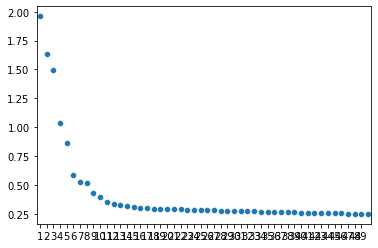

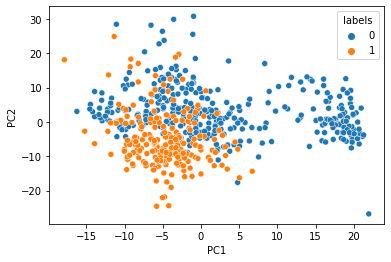

In [151]:
"""
PCA
"""
from sklearn import decomposition

X = data_scaled.copy()
n_PCAs = 50
pca = decomposition.PCA(n_components=n_PCAs)
pca.fit(X)
X = pca.transform(X)
X.shape
pca.explained_variance_ratio_
pca.components_.shape

#Elbow plot
plt.xticks(np.arange(1, n_PCAs, 1))
plt.xlim(0.5,n_PCAs+0.5)
sns.scatterplot(np.arange(1,len(pca.explained_variance_)+1) , pca.explained_variance_ratio_*100)
plt.show()

X = pd.DataFrame(X)
X['labels'] = labels

sns.scatterplot(data=X,x=X.iloc[:,0],y=X.iloc[:,1], hue = 'labels')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


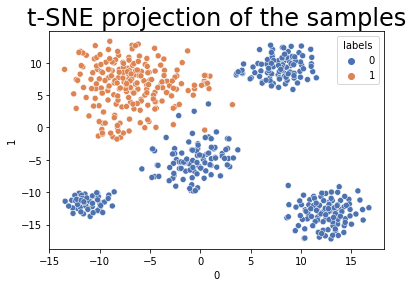

In [152]:
"""
T-SNE
"""
from sklearn.manifold import TSNE

reducer = TSNE()
TSNE_projections = reducer.fit_transform(data_scaled)
TSNE_projections.shape
TSNE_projections = pd.DataFrame(TSNE_projections , index = data_scaled.index)
TSNE_projections['labels'] = labels

sns.scatterplot(data= TSNE_projections, x = TSNE_projections.iloc[:,0] , y = TSNE_projections.iloc[:,1] , hue = 'labels' , palette = 'deep')
plt.title('t-SNE projection of the samples' , fontsize = 24)
plt.show()


In [153]:
"""
Parameter Selection
"""
X = np.array(data_scaled)
y = np.array(labels)
y.shape

(570,)

In [154]:
"""
GridSearch
"""

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold
CV= 5
scoring_metric = ['f1','accuracy']

In [155]:
from sklearn.svm import SVC
Supp_para = { 'kernel': ['linear','poly', 'rbf'],
            'degree': np.arange(2,5),
            'gamma': ['scale', 'auto']}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


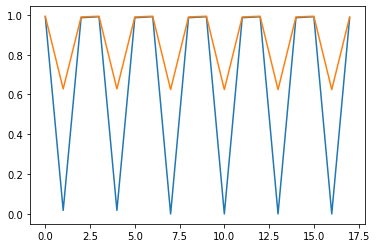

In [156]:
#Multiple metrics
Supp_gscv = GridSearchCV(SVC(), Supp_para, cv=CV, scoring = scoring_metric, refit = False)
Supp_gscv.fit(X, y)

#getting the best scores and best parameters and plotting
best_scores = {}
best_params = {}
for each in scoring_metric:
    best_scores[f'best_score_mean_test_{each}'] = np.max(Supp_gscv.cv_results_[f'mean_test_{each}'])
    best_score_index = np.where(Supp_gscv.cv_results_[f'mean_test_{each}'] == np.max(Supp_gscv.cv_results_[f'mean_test_{each}'] ))[0][0]
    best_params[f'best_param_{each}'] = Supp_gscv.cv_results_['params'][best_score_index]
    sns.lineplot(np.arange(0,len(Supp_gscv.cv_results_[f'mean_test_{each}'] )) ,Supp_gscv.cv_results_[f'mean_test_{each}'])
plt.show()


In [158]:
print(best_scores)
print(best_params)

{'best_score_mean_test_f1': 0.9905862574786148, 'best_score_mean_test_accuracy': 0.9929824561403509}
{'best_param_f1': {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, 'best_param_accuracy': {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}}


In [159]:
'''
K nearest neighbours grid search for best parameters
'''
from sklearn.neighbors import KNeighborsClassifier
KNN_para = {'n_neighbors': np.arange(5,20),
            'weights':['uniform', 'distance']}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


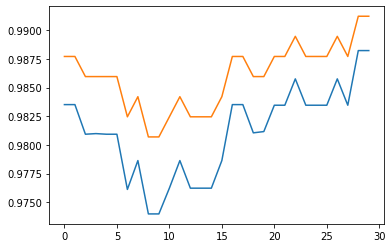

In [160]:
#Multiple metrics
KNN_gscv = GridSearchCV(KNeighborsClassifier(), KNN_para, cv=CV, scoring = scoring_metric, refit = False)
KNN_gscv.fit(X, y)

#getting the best scores and best parameters and plotting
best_scores = {}
best_params = {}
for each in scoring_metric:
    best_scores[f'best_score_mean_test_{each}'] = np.max(KNN_gscv.cv_results_[f'mean_test_{each}'])
    best_score_index = np.where(KNN_gscv.cv_results_[f'mean_test_{each}'] == np.max(KNN_gscv.cv_results_[f'mean_test_{each}'] ))[0][0]
    best_params[f'best_param_{each}'] = KNN_gscv.cv_results_['params'][best_score_index]
    sns.lineplot(np.arange(0,len(KNN_gscv.cv_results_[f'mean_test_{each}'] )) ,KNN_gscv.cv_results_[f'mean_test_{each}'])
plt.show()



In [161]:
print(best_scores)
print(best_params)

{'best_score_mean_test_f1': 0.9882333163021443, 'best_score_mean_test_accuracy': 0.9912280701754386}
{'best_param_f1': {'n_neighbors': 19, 'weights': 'uniform'}, 'best_param_accuracy': {'n_neighbors': 19, 'weights': 'uniform'}}


In [162]:
"""
Training the models
"""
X = np.array(data_scaled)
y = np.array(labels)
X.shape
y.shape
#Generating the models
accuracies_tree = []
accuracies_SV = []
accuracies_KNN = []

f1_tree = []
f1_SV = []
f1_KNN = []


1
2


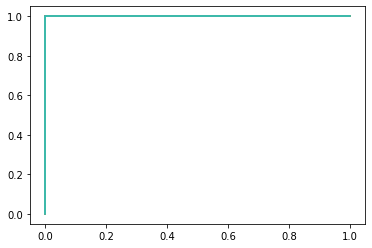

In [176]:
coeff_SVC = pd.DataFrame(index = data_scaled.columns)
for i in range(1,3):
    print(i)
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits = 5 , shuffle= True , random_state= i)
    j = 0
    for train , test in skf.split(X , y):
        X_train , X_test = X[train] , X[test]
        y_train , y_test = y[train] , y[test]
        j +=1
        from sklearn.svm import SVC
        SV = SVC(degree = 2 , gamma = 'scale', kernel ='linear', probability=True)
        SV.fit(X_train , y_train)
        coeff_SVC.loc[:,f"iter {i} CV {j}"] = SV.coef_[0]
        y_pred = SV.predict(X_test)
        y_pred_proba = SV.predict_proba(X_test)
        accuracies_SV.append(accuracy_score(y_test , y_pred))
        f1_SV.append(matthews_corrcoef(y_test, y_pred))
        fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba[:,1])
        plt.plot(fpr , tpr)


In [186]:
coeff_SVC =pd.DataFrame(coeff_SVC.mean(axis = 1),columns = ['mean_feature_imp']).sort_values('mean_feature_imp', ascending = False) 
coeff_SVC.head(10)

,mean_feature_imp
gene_1798,0.014948
gene_2156,0.014733
gene_1042,0.012709
gene_4170,0.012595
gene_81,0.012000
gene_620,0.011980
gene_1870,0.011587
gene_2715,0.011504
gene_92,0.010980
gene_1552,0.010892


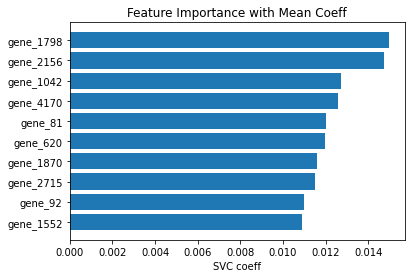

In [187]:
plt.barh(y=coeff_SVC.head(n=10).index, width =coeff_SVC.head(n=10).loc[:,'mean_feature_imp'])
plt.gca().invert_yaxis()
plt.title("Feature Importance with Mean Coeff")
plt.xlabel('SVC coeff')
plt.show()


1
2


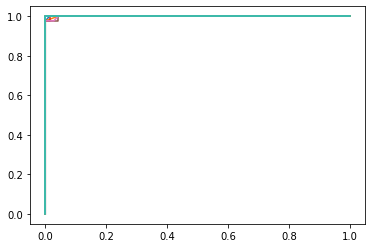

In [188]:
#K nearest neighbour
coeff_KNN = pd.DataFrame(index = data_scaled.columns)
for i in range(1,3):
    print(i)
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits = 5 , shuffle= True , random_state= i)
    j = 0
    for train , test in skf.split(X , y):
        X_train , X_test = X[train] , X[test]
        y_train , y_test = y[train] , y[test]
        j +=1
        from sklearn.neighbors import KNeighborsClassifier
        KNN = KNeighborsClassifier(n_neighbors=19 , weights = 'uniform')
        KNN.fit(X_train , y_train)
        y_pred = KNN.predict(X_test)
        y_pred_proba = KNN.predict_proba(X_test)
        accuracies_KNN.append(accuracy_score(y_test , y_pred))
        f1_KNN.append(matthews_corrcoef(y_test, y_pred))
        fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba[:,1])
        plt.plot(fpr , tpr)
plt.show()

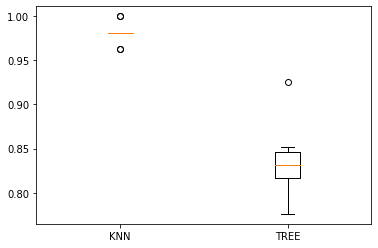

In [190]:
box_plots_accuracies = {'KNN': accuracies_KNN, 
                        'TREE': accuracies_tree,
                        }
box_plots_f1 = {'KNN': f1_KNN, 
                'TREE': f1_tree, 
                }
parameter_to_plot = box_plots_f1
fig, ax = plt.subplots()
ax.boxplot(parameter_to_plot.values())
ax.set_xticklabels(parameter_to_plot.keys())
plt.show()

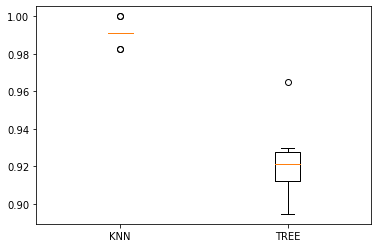

In [191]:
box_plots_accuracies = {'KNN': accuracies_KNN, 
                        'TREE': accuracies_tree,
                        }
parameter_to_plot = box_plots_accuracies
fig, ax = plt.subplots()
ax.boxplot(parameter_to_plot.values())
ax.set_xticklabels(parameter_to_plot.keys())
plt.show()

In [193]:
print(np.max(accuracies_KNN))
print(np.max(accuracies_tree))


1.0
0.9649122807017544


In [194]:
"""
testing validator
"""
#remove features
X_validator.shape
X_validator = X_validator.loc[:,data_filtered.columns]

In [195]:
#separate classes for imputation
class0_validator = y_validator[y_validator == 0]
class1_validator = y_validator[y_validator == 1]

X_validator_class0 = X_validator.loc[class0_validator.index,:]
X_validator_class1 = X_validator.loc[class1_validator.index,:]

print(X_validator_class0.shape)
print(X_validator_class1.shape)

(19, 4458)
(11, 4458)


In [198]:
#paste with filtered data
data_impute_validator_class0 = data_filtered_class0.append(X_validator_class0)
print(data_filtered_class0.shape)
print(data_impute_validator_class0.shape)
data_impute_validator_class0.isna().sum()

(356, 4458)
(375, 4458)


gene_2        0
gene_4        0
gene_5       38
gene_7        0
gene_8        0
             ..
gene_4996     0
gene_4997     0
gene_4998     0
gene_4999     0
gene_5000     0
Length: 4458, dtype: int64

In [199]:
#paste with filtered data
data_impute_validator_class1 = data_filtered_class1.append(X_validator_class1)
print(data_filtered_class1.shape)
print(data_impute_validator_class1.shape)
data_impute_validator_class1.isna().sum()

(214, 4458)
(225, 4458)


gene_2        0
gene_4        0
gene_5       13
gene_7        0
gene_8        0
             ..
gene_4996     0
gene_4997     0
gene_4998     0
gene_4999     0
gene_5000     0
Length: 4458, dtype: int64

In [200]:
#imputing KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan , n_neighbors=5)
data_imputed_validator_class0 = imputer.fit_transform(data_impute_validator_class0)
data_imputed_validator_class0 = pd.DataFrame(data_imputed_validator_class0, columns=data_impute_validator_class0.columns,index=data_impute_validator_class0.index)
data_imputed_validator_class0.isna().sum()

data_imputed_validator_class1 = imputer.fit_transform(data_impute_validator_class1)
data_imputed_validator_class1 = pd.DataFrame(data_imputed_validator_class1, columns=data_impute_validator_class1.columns,index=data_impute_validator_class1.index)
data_imputed_validator_class1.isna().sum()

data_validator_imputed = data_imputed_validator_class0.append(data_imputed_validator_class1)


gene_2       0
gene_3339    0
gene_3345    0
gene_3344    0
gene_3343    0
gene_3342    0
gene_3341    0
gene_3340    0
gene_3338    0
gene_3330    0
gene_3337    0
gene_3336    0
gene_3335    0
gene_3334    0
gene_3333    0
dtype: int64

In [208]:
data_validator_imputed.loc[:,'gene_5'].isna().sum()

0

In [201]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_validator_scaled = scaler.fit_transform(data_validator_imputed)
data_validator_scaled = pd.DataFrame(data_validator_scaled, columns = data_validator_imputed.columns , index = data_validator_imputed.index)
data_validator_scaled.isna().sum().sort_values(ascending=False)[0:15]
X_validator = data_validator_scaled.loc[X_validator.index ,data_imputed.columns]


In [204]:
X_validator = np.array(X_validator)
y_validator.shape

y_validator = np.array(y_validator)
y_pred_validator = KNN.predict(X_validator)
print(accuracy_score(y_validator , y_pred_validator))
print(f1_score(y_validator , y_pred_validator))

1.0
1.0


In [206]:
X_validator = np.array(X_validator)
y_validator.shape

y_validator = np.array(y_validator)
y_pred_validator = SV.predict(X_validator)
print(accuracy_score(y_validator , y_pred_validator))
print(f1_score(y_validator , y_pred_validator))

1.0
1.0


In [ ]:
"""
Greedy Search
"""
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=19 , weights = 'uniform')
selector = SequentialFeatureSelector(estimator=KNN , n_features_to_select=10, direction="forward")
selector.fit(data_scaled , labels)
greedy_selected_features_forward = selector.get_feature_names_out()

In [211]:
greedy_selected_features_forward

AttributeError: ignored

In [ ]:
selector = SequentialFeatureSelector(estimator=KNN , n_features_to_select=10, direction="backward")
selector.fit(data_scaled , labels)
greedy_selected_features_backward = selector.get_feature_names_out()